**Explanatory Linear Regression Function**

Explonatory Data Analysis to check how the Open, High, Low and Volume affects the closing price fot the GOOGL stock market

In [56]:
#import necessary modules
import pandas as pd
import numpy as np

In [57]:
#read the usdcad.csv file and convert it into a dataframe
df = pd.read_csv("GOOGL.csv", header = 0, sep = ",")

#first 5 entries of the df
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-19,1527.199951,1530.739990,1520.979980,1524.869995,1524.869995,1137300
1,2020-02-20,1519.010010,1527.069946,1504.260010,1516.989990,1516.989990,1298100
2,2020-02-21,1504.579956,1510.949951,1478.489990,1483.459961,1483.459961,2126000
3,2020-02-24,1423.050049,1436.380005,1406.790039,1419.859985,1419.859985,2478000
4,2020-02-25,1431.000000,1436.849976,1380.420044,1386.319946,1386.319946,2579000


Check the descriptive stats and info on the data

In [58]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
print("Descriptive Statistics\n", df.describe()) #descriptive stat on data

Descriptive Statistics
               Open         High          Low        Close    Adj Close  \
count   254.000000   254.000000   254.000000   254.000000   254.000000   
mean   1536.570828  1557.449013  1517.383625  1538.144383  1538.144383   
std     231.474739   231.612975   233.628111   232.203723   232.203723   
min    1056.369995  1066.910034  1008.869995  1054.130005  1054.130005   
25%    1402.985046  1424.250000  1386.997528  1407.352509  1407.352509   
50%    1508.625000  1523.605041  1495.380005  1511.445007  1511.445007   
75%    1729.015015  1754.382507  1716.315002  1734.460053  1734.460053   
max    2107.790039  2145.139893  2096.850098  2118.620117  2118.620117   

             Volume  
count  2.540000e+02  
mean   2.020885e+06  
std    9.257857e+05  
min    4.656000e+05  
25%    1.420975e+06  
50%    1.711650e+06  
75%    2.467975e+06  
max    5.417900e+06  


In [59]:
print("\nInformation on Data\n", df.info()) #prints the information on data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
Date         254 non-null object
Open         254 non-null float64
High         254 non-null float64
Low          254 non-null float64
Close        254 non-null float64
Adj Close    254 non-null float64
Volume       254 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.0+ KB

Information on Data
 None


**Data Cleaning**

In [60]:
#check columns with missing values
columns_missing_values = df.isna().sum() #sums columns with missing values
#filter columns with at least one missing value
columns_missing_values = columns_missing_values[columns_missing_values != 0]
#print number of columns with missing values
print("Total Columns Missing Values: ", len(columns_missing_values))

Total Columns Missing Values:  0


There are no columns that has any missing values. Therefore we continue with the analysis

**Correlation Matrix**

Check Correlation within the variables to see which one has a positive impact on the closing price

In [61]:
#creates a correlation matrix
print("Correlation Matrix")
round(df.corr(), 2)

Correlation Matrix


,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,0.99,0.99,-0.43
High,1.00,1.00,1.00,1.00,1.00,-0.41
Low,1.00,1.00,1.00,1.00,1.00,-0.46
Close,0.99,1.00,1.00,1.00,1.00,-0.45
Adj Close,0.99,1.00,1.00,1.00,1.00,-0.45
Volume,-0.43,-0.41,-0.46,-0.45,-0.45,1.00


The correlation is high between closing, high, low, open and adj closing price. Meaning the high, low and opening price have
an impact on the closing price. Therefore we can use any of the variables as explanatory variables to predict the closing price or all of them.

**Visualizing the Correlation**

Heatmap

In [62]:
#import seaborn and matplotlib.pyplot to be able to plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

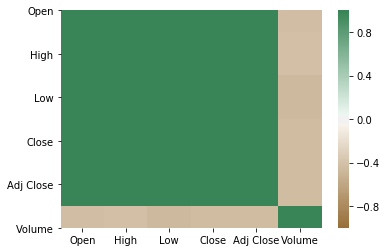

In [63]:
correlation_df = df.corr() #assign a correlation_df to correlation data

axis_corr = sns.heatmap(correlation_df, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(50, 500, n = 500), square = True)
plt.show()

Scatter Graph

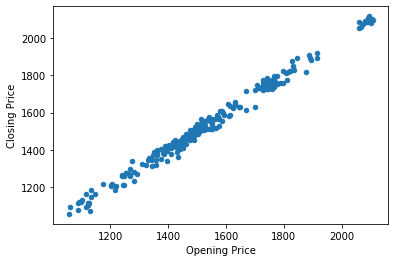

In [64]:
#plots scatter graph between opening and closing prices
df.plot(x = "Open", y = "Close", kind = "scatter"),
plt.ylabel("Closing Price")
plt.xlabel("Opening Price")
plt.show()

In [66]:
#Since there is no relationship between the Volumes and the Closing price (indicated by a negative correlation), we are removing the Date Column
df.drop(columns = ["Volume"], inplace = True)

print(df.head(3))

         Date         Open         High         Low        Close    Adj Close
0  2020-02-19  1527.199951  1530.739990  1520.97998  1524.869995  1524.869995
1  2020-02-20  1519.010010  1527.069946  1504.26001  1516.989990  1516.989990
2  2020-02-21  1504.579956  1510.949951  1478.48999  1483.459961  1483.459961


**Linear Regression Table**

Build a Linear Regression table using the High, Low, open and close

In [67]:
#import the necessary modules
import statsmodels.formula.api as smf


model = smf.ols("Close ~ Open + High + Low", data = df)
results = model.fit() #fit the data properly
print(results.summary()) #prints the summary of results

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.214e+04
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          4.94e-323
Time:                        21:39:12   Log-Likelihood:                -986.98
No. Observations:                 254   AIC:                             1982.
Df Residuals:                     250   BIC:                             1996.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3424      5.505      2.060      0.0

The R-Squared of the explanatory variables and the variable we want to predict is high at 0.997, meaning most of the data points are close to the linear regression function line, therefore the model fts the data very well.

The P-Value of the Intercept, Open, High and Low is below 0.050, which means that the three vaiables have a significant impact on the closing price of the GOOGL. Therefore we can reject the null hypothesis

The coefficient indicates that the closing price will increas by -0.4936, 0.7042, 0.7833 when the Open, High and Low increases by 1 respectively. The intercept of the Closing price is 11.3424 when the Open, High and Low are 0.

**Creating the Function**

Creating the function with the data from the OLS Regression Table

In [70]:
df.tail(2)

,Date,Open,High,Low,Close,Adj Close
252,2021-02-18,2105.000000,2121.989990,2093.330078,2105.810059,2105.810059
253,2021-02-19,2107.790039,2118.580078,2096.850098,2098.263184,2098.263184


In [72]:
#creating the prediction function using the open, high and low prices
def predict_closing_price(Open, High, Low):
    return Open * -0.4936 + High * 0.7042 + Low * 0.7833 + 11.3424

#use the last open, high and low to predict the closing price
print("Close: ",predict_closing_price(2107.790039, 2118.580078, 2096.850098))

Close:  2105.3040094406


In [73]:
#Use Open price to predict the Close price
def predict_close(Open):
    return Open * -0.4936 + 11.3424

#use the Open price to predict the closing price
print("Close: ", predict_close(2107.790039))

Close:  -1029.0627632504


In [78]:
#Use High price to predict the Close price
def predict_close(High):
    return High * 0.7042 + 11.3424

#use the High price to predict the closing price
print("Close: ", predict_close(2118.580078))

Close:  1503.2464909276


**Creating the Linear Regression Model**

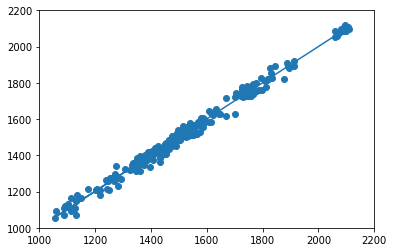

In [79]:
#import the necessary library
from scipy import stats

#Create the model
x = df["Open"]
y = df["Close"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myFunc(x):
    return slope * x + intercept

mymodel = list(map(myFunc, x))

plt.scatter(x, y) #plots an ordinary scatter graph
plt.plot(x, mymodel) #plots a linear regression model
plt.ylim(1000, 2200)
plt.xlim(1000, 2200)
plt.show()